# Operate First metrics

In this notebook, we fetch and visualize some interesting metrics that we collect from Operate First prometheus instance.

In [1]:
from prometheus_api_client import PrometheusConnect
from prometheus_api_client.metric_range_df import MetricRangeDataFrame
from prometheus_api_client.utils import parse_datetime
from datetime import timedelta
import pandas as pd

## Fetch all metrics

In [2]:
prom_url = "http://prometheus-portal-opf-monitoring.apps.cnv.massopen.cloud"
print("Prometheus uri: ", prom_url)

# Creating the prometheus connect object with the required parameters
pc = PrometheusConnect(url=prom_url, disable_ssl=True)

# Fetching a list of all metrics scraped by the Prometheus host.
all_metrics = pd.DataFrame(pc.all_metrics(), columns={"metrics"})

#Print all the metrics
all_metrics

Prometheus uri:  http://prometheus-portal-opf-monitoring.apps.cnv.massopen.cloud


,metrics
0,:kube_pod_info_node_count:
1,:node_memory_MemAvailable_bytes:sum
2,ALERTS
3,ALERTS_FOR_STATE
4,NooBaa_accounts_num
...,...
3001,workqueue_retries_total
3002,workqueue_unfinished_work_seconds
3003,workqueue_work_duration_seconds_bucket
3004,workqueue_work_duration_seconds_count


## Fetch metric data and visualize
* cluster:memory_usage_bytes:sum
* cluster:cpu_usage_cores:sum
* authentication_attempts
* jupyterhub_total_users
* ceph_cluster_total_used_bytes

In [3]:
## Define function to fetch data for 3 days
def fetch_3day_metric(metric_name):
    # Request last week's data
    metric_data = pc.get_metric_range_data(
        metric_name,  # metric name and label config
        start_time=parse_datetime(
            "3 days ago"
        ),  # datetime object for metric range start time
        end_time=parse_datetime(
            "now"
        ),  # datetime object for metric range end time
        chunk_size=timedelta(
            days=1
        ),  # timedelta object for duration of metric data downloaded in one request
    )

    ## Make the dataframe
    metric_df = MetricRangeDataFrame(metric_data)
    metric_df.index = pd.to_datetime(metric_df.index, unit="s", utc=True)
    
    return metric_df

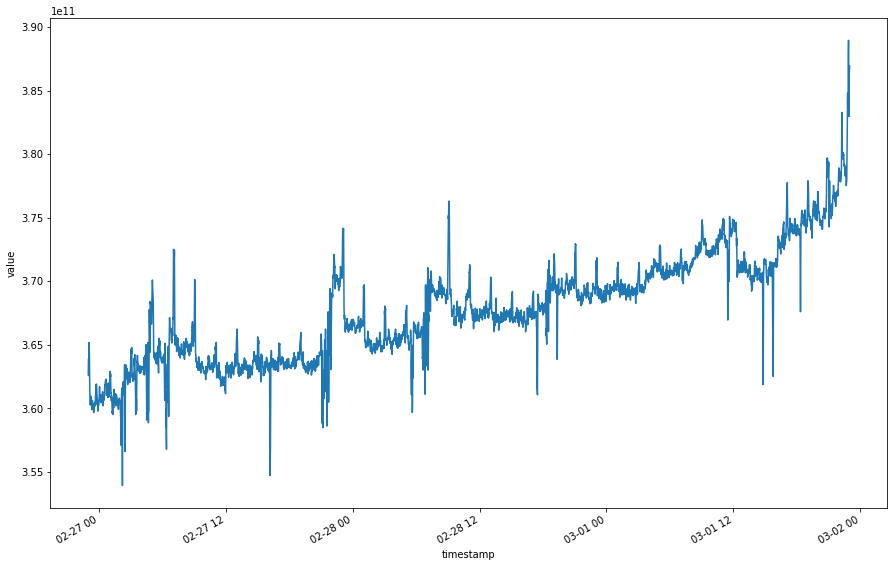

In [4]:
## Fetch data for cluster:memory_usage_bytes:sum

cluster_mem_usg = fetch_3day_metric("cluster:memory_usage_bytes:sum")
cluster_mem_usg['value'].astype(float).plot(figsize=(15,10), ylabel="value")
cluster_mem_usg.to_csv("../data/raw/cluster_mem_usg.csv")

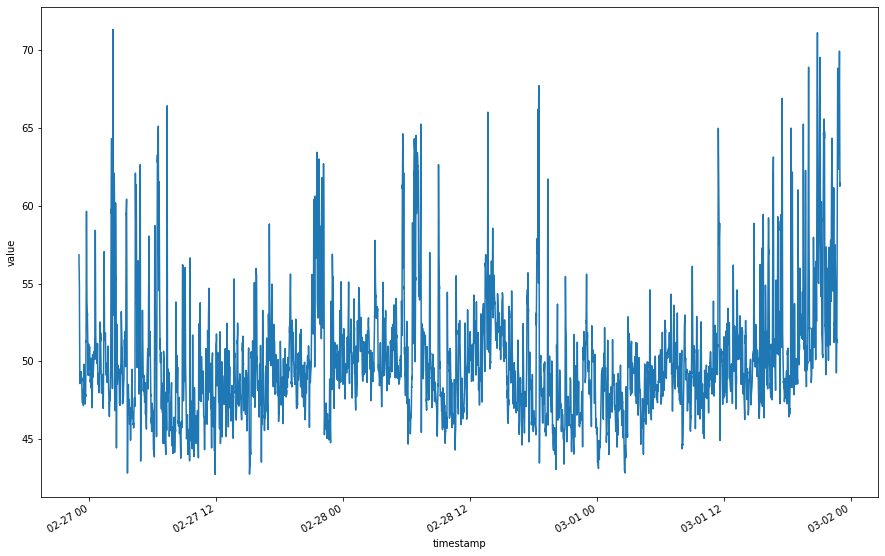

In [5]:
## Fetch data for cluster:cpu_usage_cores:sum

cluster_cpu_usg = fetch_3day_metric("cluster:cpu_usage_cores:sum")
cluster_cpu_usg['value'].astype(float).plot(figsize=(15,10), ylabel="value")
cluster_cpu_usg.to_csv("../data/raw/cluster_cpu_usg.csv")

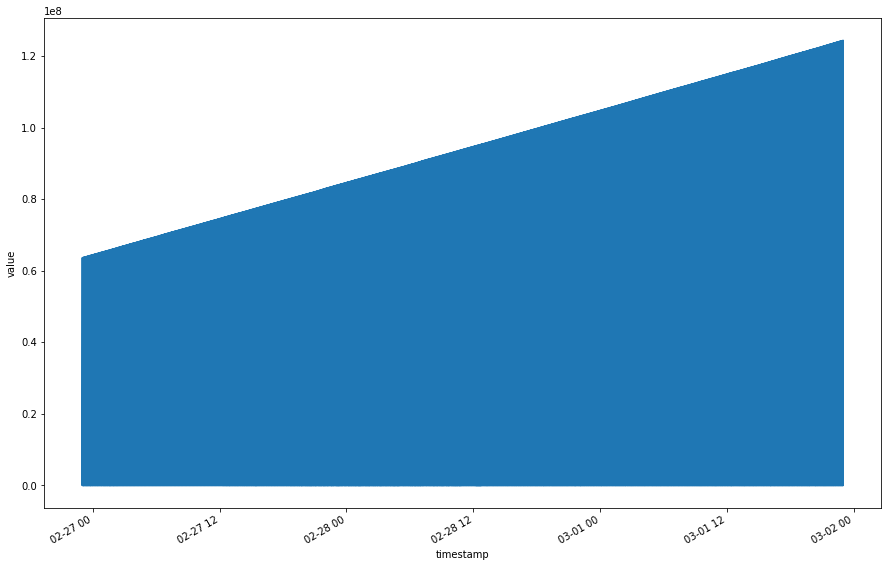

In [6]:
## Fetch data for authentication_attempts

authentication_attempts = fetch_3day_metric("authentication_attempts")
authentication_attempts['value'].astype(float).plot(figsize=(15,10), ylabel="value")
authentication_attempts.to_csv("../data/raw/authentication_attempts.csv")

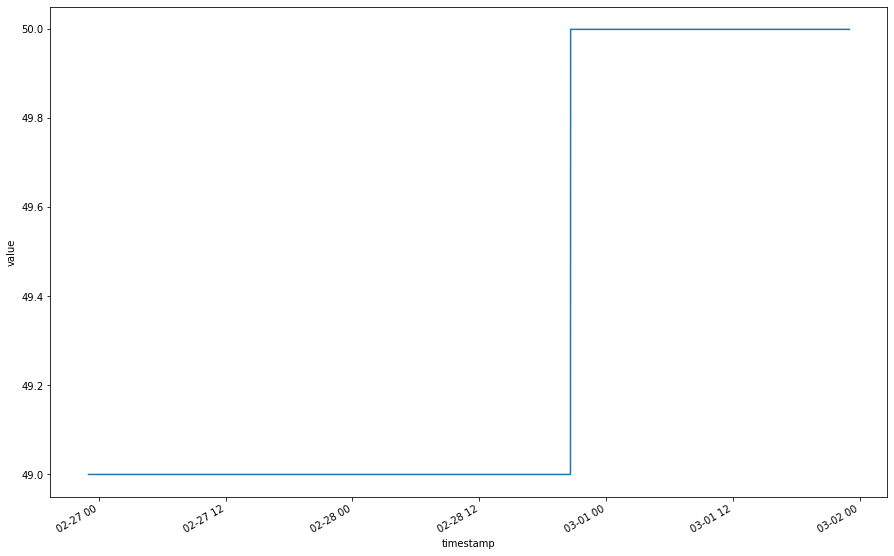

In [7]:
## Fetch data for jupyterhub_total_users

jupyterhub_total_users = fetch_3day_metric("jupyterhub_total_users")
jupyterhub_total_users['value'].astype(float).plot(figsize=(15,10), ylabel="value")
jupyterhub_total_users.to_csv("../data/raw/jupyterhub_total_users.csv")

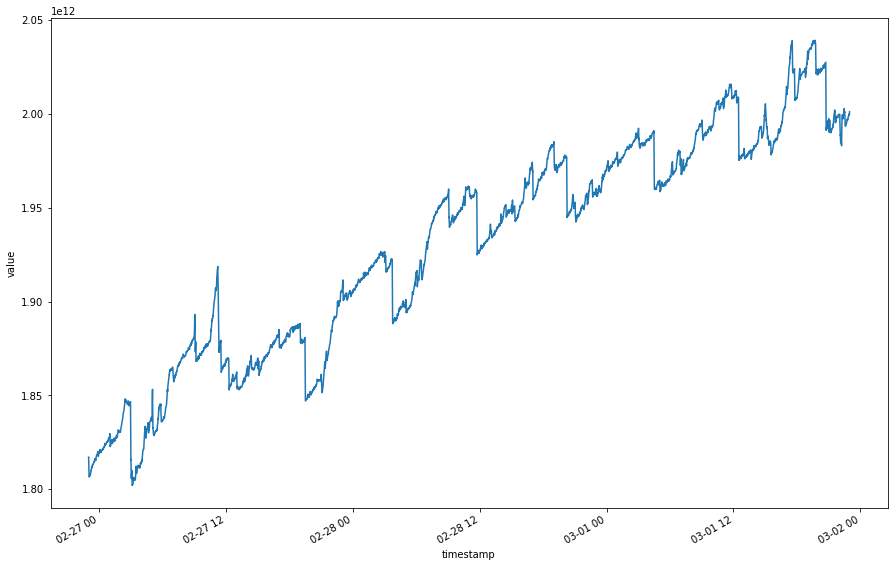

In [8]:
## Fetch data for ceph_cluster_total_used_bytes

ceph_mem_usg = fetch_3day_metric("ceph_cluster_total_used_bytes")
ceph_mem_usg['value'].astype(float).plot(figsize=(15,10), ylabel="value")
ceph_mem_usg.to_csv("../data/raw/ceph_mem_usg.csv")

We can use these sample time series to understand some of the Operate First metrics.  This notebook can also be used to define new problem statements and fetch corresponding metrics.